In [2]:
import matplotlib.pyplot as pl
import matplotlib.pyplot as plt
import numpy as np


#point = []

A = np.matrix([[1,1,1,0],[0,1,0,1]])


print(A[:][:])
A[:,:3]

[[1 1 1 0]
 [0 1 0 1]]


matrix([[1, 1, 1],
        [0, 1, 0]])

In [3]:
def produce_combinations(n,min=0,base=2):
    '''
    here n is the max element and min in the min element of the set of consecutive 
    elements and base is the number of 'numbers' required in each combination
    '''
    base-=1
    a = []
    b = [] 

    def loop_function(i,till,ntimes):
        for j in range(i+1,till+1):
            b.append(j)
            if ntimes:
                loop_function(j,till,ntimes-1)
            else:
                a.append(b.copy())
                b.pop(-1)   
        b.pop(-1)
        
          
    for i in range(min,n):
        b.append(i)
        loop_function(i,n,base-1)
        
    return a

print(*produce_combinations(3,0,2))

[0, 1] [0, 2] [0, 3] [1, 2] [1, 3] [2, 3]


In [89]:
def LPP_point(A,b):
    x = np.linspace(-10,10)
    indices = produce_combinations(np.size(A[0])-1,0,np.size(A)/np.size(A[0]))
    ret = []
    for i in indices:
        try:
            
            init_out = (np.linalg.inv(A[:,i])*np.matrix(b).transpose()).transpose()
            fin_out = np.array([0]*np.size(A[0]))
            fin_out[tuple([i])] = init_out  #we convert it to tuple to avoid future warning
            ret.append(fin_out.copy())
            print(fin_out)
            if list(fin_out>=0) == [True for i in fin_out]:
                plt.scatter(fin_out[0],fin_out[1])
            else:
                print('not plotted')
        except Exception as E: 
            print('non invertible-----------\n',A[:,i],'\n-------------------------')
    
    for i in range(len(b)):
        print(A[i,0]/A[i,1],b[i])
        if A[i,1] !=0:
            plt.plot(x,(-1)*A[i,0]/A[i,1]*x+b[i]/A[i,1])
        else:
            plt.plot([b[i]/A[i,0] for j in x],x)
    plt.plot(x,0*x)
    plt.plot([0 for i in x],x)

    plt.show()
    return ret


[3 3 0 0]
non invertible-----------
 [[1 1]
 [0 0]] 
-------------------------
[6 0 0 3]
[0 3 3 0]
[ 0  6  0 -3]
not plotted
[0 0 6 3]
1.0 6
0.0 3


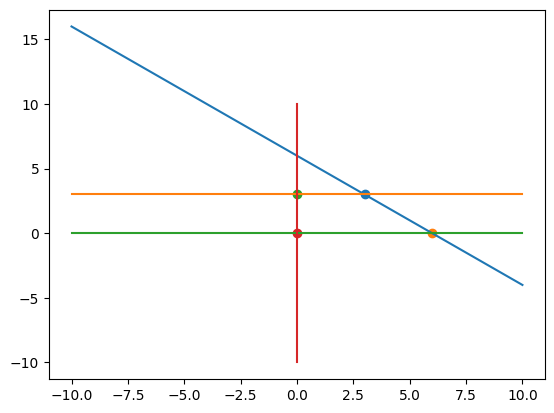

[array([3, 3, 0, 0]),
 array([6, 0, 0, 3]),
 array([0, 3, 3, 0]),
 array([ 0,  6,  0, -3]),
 array([0, 0, 6, 3])]

In [90]:
LPP_point(A,[6,3])

[3 3 0 0 0]
[3 3 0 0 0]
[3 3 0 0 0]
[ 9  0 -3  3  0]
not plotted
non invertible-----------
 [[1 1 0]
 [0 0 0]
 [1 0 1]] 
-------------------------
[6 0 0 3 3]
[ 0  4  1 -1  0]
not plotted
[0 3 3 0 3]
[ 0  6  0 -3 -3]
not plotted
[0 0 6 3 9]
1.0 6
0.0 3
0.5 9


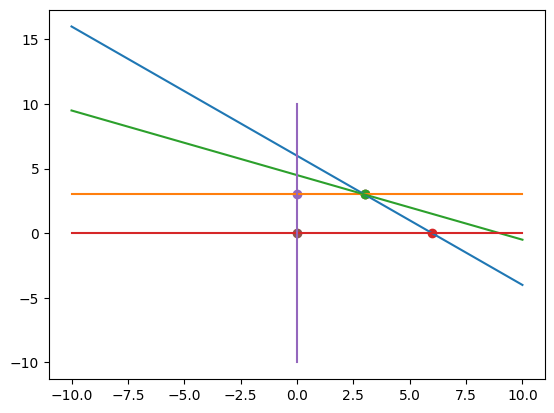

[array([3, 3, 0, 0, 0]),
 array([3, 3, 0, 0, 0]),
 array([3, 3, 0, 0, 0]),
 array([ 9,  0, -3,  3,  0]),
 array([6, 0, 0, 3, 3]),
 array([ 0,  4,  1, -1,  0]),
 array([0, 3, 3, 0, 3]),
 array([ 0,  6,  0, -3, -3]),
 array([0, 0, 6, 3, 9])]

In [91]:
B = np.matrix([[1,1,1,0,0],[0,1,0,1,0],[1,2,0,0,1]])
LPP_point(B,[6,3,9])

[2 1 0 0]
non invertible-----------
 [[1 1]
 [0 0]] 
-------------------------
[4 0 0 1]
[0 1 2 0]
[ 0  2  0 -1]
not plotted
[0 0 4 1]
0.5 4
0.0 1


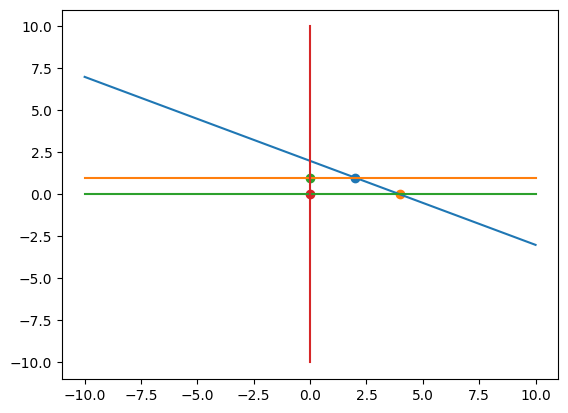

[array([2, 1, 0, 0]),
 array([4, 0, 0, 1]),
 array([0, 1, 2, 0]),
 array([ 0,  2,  0, -1]),
 array([0, 0, 4, 1])]

In [92]:
C = np.matrix([[1,2,1,0],[0,1,0,1]])
LPP_point(C,[4,1])

[ 4  1  0 12  0  0]
[ 16  13 -35   0 -12   0]
not plotted
[ 4  7 -5  0  0  6]
not plotted
[ 4  1  0 11  0  0]
[ 4  2  0 10  0  1]
[2 6 0 0 2 7]
[ 3  0  4 13  1  0]
[ 4  0  2 14  0 -1]
not plotted
[-10   0  30   0  14  13]
not plotted
[ 5  0  0 15 -1 -2]
not plotted
[ 0 -3 13 16  4  0]
not plotted
non invertible-----------
 [[ 1  1  0  0]
 [ 2  0  1  0]
 [ 0  0  0  0]
 [-1  0  0  1]] 
-------------------------
[0 5 5 0 4 8]
[  0  10   0 -10   4  13]
not plotted
[ 0  0 10 10  4  3]
2.0 10
-0.5 10
inf 4
-1.0 3


C:\Users\siddh\AppData\Local\Temp\ipykernel_1896\2486485048.py:21: RuntimeWarning: divide by zero encountered in long_scalars
  print(A[i,0]/A[i,1],b[i])


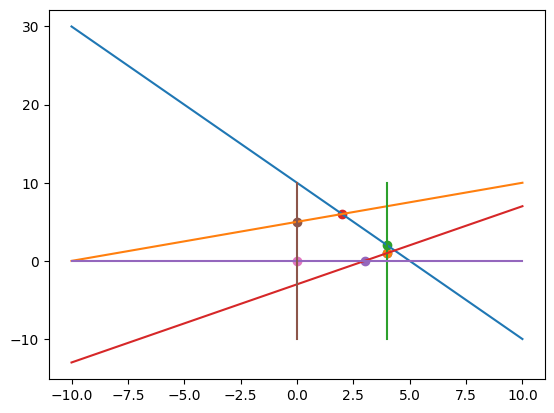

[array([ 4,  1,  0, 12,  0,  0]),
 array([ 16,  13, -35,   0, -12,   0]),
 array([ 4,  7, -5,  0,  0,  6]),
 array([ 4,  1,  0, 11,  0,  0]),
 array([ 4,  2,  0, 10,  0,  1]),
 array([2, 6, 0, 0, 2, 7]),
 array([ 3,  0,  4, 13,  1,  0]),
 array([ 4,  0,  2, 14,  0, -1]),
 array([-10,   0,  30,   0,  14,  13]),
 array([ 5,  0,  0, 15, -1, -2]),
 array([ 0, -3, 13, 16,  4,  0]),
 array([0, 5, 5, 0, 4, 8]),
 array([  0,  10,   0, -10,   4,  13]),
 array([ 0,  0, 10, 10,  4,  3])]

In [93]:
D = np.matrix([[2,1,1,0,0,0],[-1,2,0,1,0,0],[1,0,0,0,1,0],[1,-1,0,0,0,1]])
LPP_point(D,[10,10,4,3])

[ 1  2 13  0  0  0]
[1 0 0 3 0 0]
[ 4 -1  0  0  4  0]
not plotted
[ 28 -11   0   0   0 -67]
not plotted
[1 0 3 2 0 0]
[2 0 5 0 3 0]
[  6   0  11   0   0 -12]
not plotted
[-4  0  0 10 -9  0]
not plotted
[-1  0  0  3  0  6]
not plotted
[ 0  0  0  0  5 10]
non invertible-----------
 [[  5  -1   1]
 [ -8   2   0]
 [-12   3   0]] 
-------------------------
[ 0  3 19  0 -1  0]
not plotted
[ 0  3 14  0  0  3]
[ 0  0  0  4 -1  0]
not plotted
[0 0 0 3 0 3]
[ 0  0  0  0  5 11]
[ 0  0  3  4 -1  0]
not plotted
[0 0 2 3 0 3]
[ 0  0 -1  0  6 12]
not plotted
[0 0 0 1 4 9]
0.4 1
0.375 4
0.16666666666666666 9


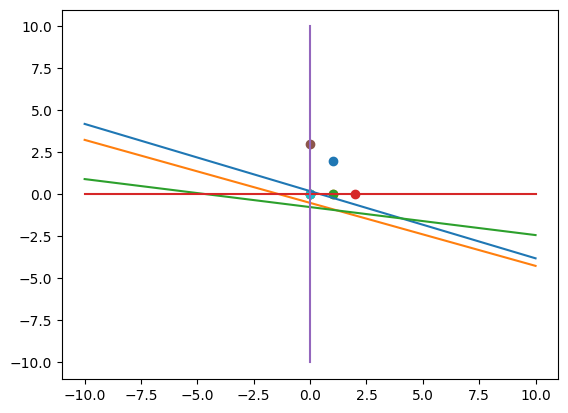

[array([ 1,  2, 13,  0,  0,  0]),
 array([1, 0, 0, 3, 0, 0]),
 array([ 4, -1,  0,  0,  4,  0]),
 array([ 28, -11,   0,   0,   0, -67]),
 array([1, 0, 3, 2, 0, 0]),
 array([2, 0, 5, 0, 3, 0]),
 array([  6,   0,  11,   0,   0, -12]),
 array([-4,  0,  0, 10, -9,  0]),
 array([-1,  0,  0,  3,  0,  6]),
 array([ 0,  0,  0,  0,  5, 10]),
 array([ 0,  3, 19,  0, -1,  0]),
 array([ 0,  3, 14,  0,  0,  3]),
 array([ 0,  0,  0,  4, -1,  0]),
 array([0, 0, 0, 3, 0, 3]),
 array([ 0,  0,  0,  0,  5, 11]),
 array([ 0,  0,  3,  4, -1,  0]),
 array([0, 0, 2, 3, 0, 3]),
 array([ 0,  0, -1,  0,  6, 12]),
 array([0, 0, 0, 1, 4, 9])]

In [94]:
E = np.matrix([[2,5,-1,1,0,0],[-3,-8,2,0,1,0],[-2,-12,3,0,0,1]])
LPP_point(E,[1,4,9])

[2 4 0 0]
[-6  0 -4  0]
not plotted
[-2  0  0  4]
not plotted
[ 0  3 -1  0]
not plotted
[0 2 0 2]
[0 0 2 6]
-1.0 2
-0.5 6


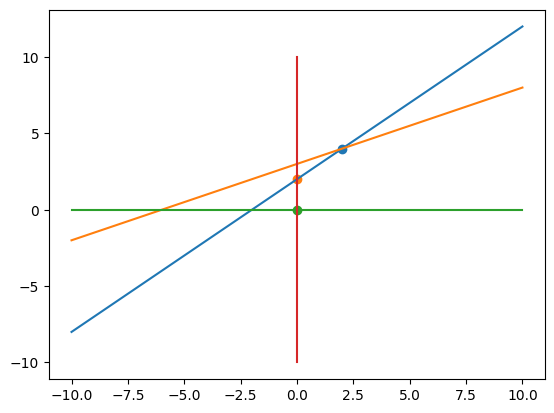

[array([2, 4, 0, 0]),
 array([-6,  0, -4,  0]),
 array([-2,  0,  0,  4]),
 array([ 0,  3, -1,  0]),
 array([0, 2, 0, 2]),
 array([0, 0, 2, 6])]

In [98]:
F = np.matrix([[-1,1,1,0],[-1,2,0,1]])
LPP_point(F,[2,6])

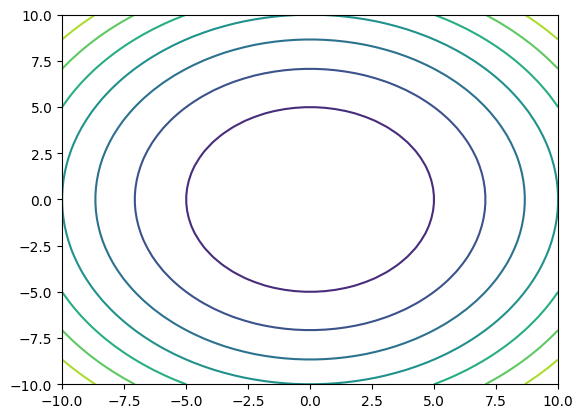

In [95]:
%matplotlib inline
y = np.linspace(-10,10)
x = np.linspace(-10,10)
x,y = np.meshgrid(x,y)
plt.contour(x,y,x**2+y**2)

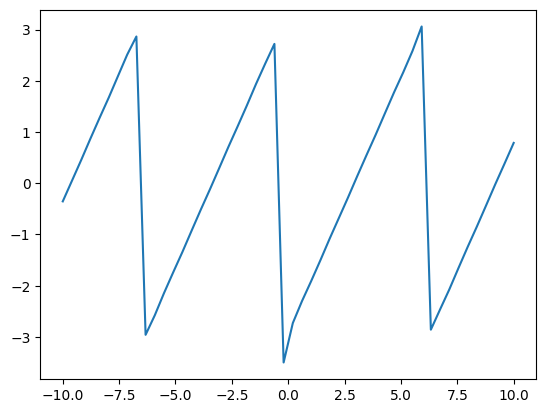

In [96]:
x = np.linspace(-10,10)
y = 2*sum([-1**i*np.sin(i*(x+6.5))/i for i in range(1,190)])
plt.plot(x,y)